# Link to tweet
https://twitter.com/franciscojarceo/status/1506265499449106435?s=20&t=yGmOyNMcEmDyGCfmqRXzfg

In [33]:
! pip3 install pandas

  Using cached pandas-1.5.0-cp310-cp310-macosx_10_9_x86_64.whl (12.0 MB)
  Using cached numpy-1.23.3-cp310-cp310-macosx_10_9_x86_64.whl (18.1 MB)


In [11]:
! pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 18.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.9 MB/s eta 0:00:0000:0100:01
  Using cached fonttools-4.37.4-py3-none-any.whl (960 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [16]:
import os
import json
import requests
import time
import pandas as pd

from matplotlib import pyplot as plt

In [13]:
%matplotlib inline

In [2]:
API_KEY = json.load(open('.env', 'rb'))['POLYGON']

In [189]:
# START_DATE = '2019-01-01'
# END_DATE = '2021-07-01'
# TICKER = 'AAPL'
# url = f'https://api.polygon.io/v1/open-close/AAPL/2020-10-14?adjusted=true&apiKey={API_KEY}'

def get_historical_price_data(TICKER: str, START_DATE: str='2019-01-01', END_DATE: str='2021-07-01') -> pd.DataFrame:
    url = f'https://api.polygon.io/v2/aggs/ticker/{TICKER}/range/1/day/{START_DATE}/{END_DATE}?adjusted=true&sort=asc&limit=50000&apiKey={API_KEY}'
    try:
        r = requests.get(url)
        rdf = pd.DataFrame(r.json())
        rdf = pd.concat([rdf, pd.json_normalize(rdf['results'])], axis=1)
        rdf['t'] = pd.to_datetime(rdf['t']*1e6)
        return rdf
    except Exception as e:
        print(f'something went wrong for {TICKER}...\n {e}')
    return pd.DataFrame()

In [82]:
r = requests.get(url)
rdf = pd.DataFrame(r.json())
rdf = pd.concat([rdf, pd.json_normalize(rdf['results'])], axis=1)
rdf['t'] = pd.to_datetime(rd['t']*1e6)

In [8]:
rdf = get_historical_price_data('AFRM')
rdf.rename({
    'v': 'trading volume of the symbol in the given time period',
    'vw': 'volume weighted average price',
    'o': 'open price for the symbol in the given time period',
    'c': 'close price for the symbol in the given time period',
    'h': 'highest price for the symbol in the given time period', 
    'l': 'lowest price for the symbol in the given time period',
    't': 'Unix Msec timestamp for the start of the aggregate window.',
    'n': 'number of transactions in the aggregate window',
}, axis=1, inplace=False).head()

In [190]:
def call_tickers_rate_limited(tickers: list, n: int=5, duration:int=60) -> list:
    sleep_time = duration / n
    output = []
    for ticker in tickers:
        res = get_historical_price_data(ticker)
        if res.shape[0] > 0:
            output.append(res)
        time.sleep(sleep_time)
    return output

In [114]:
tickers = [
    # original chart
    'FISV',
    'GPN',
    'STNE',
    'EVOP',
    'FIS',
    'PAGS',
    'SQ',
    'PYPL',
     'V',
    'MA',
    'ADYEY',
    # additional fintech
    'NRDS',
    'COIN',
    'GDOT',
    'LMND',
    'UPST',
    'OPRT',
    'SOFI',
    'MELI',
    'AFRM',
    'ROOT',
    'MQ',
    'NU',
    'HOOD',
    'LC',
    'INTU',
]

ticker_dict = {
    'FISV': 'Fiserv Inc.',
    'GPN': 'Global Payments Inc.',
    'STNE': 'StoneCo Ltd.',
    'EVOP': 'EVO Payments Inc.',
    'FIS': 'FIS',
    'PAGS': 'PagSeguro Digital Ltd.',
    'SQ': 'Block Inc',
    'PYPL': 'PayPal Holdings Inc.',
    'V': 'Visa Inc.',
    'MA': 'Mastercard Inc.',
    'ADYEY': 'Adyen',
    'NRDS': 'Nerdwallet Inc.',
    'COIN': 'Coinbase Global Inc.',
    'GDOT': 'Green Dot Corporation',
    'LMND': 'Lemonade Inc.',
    'UPST': 'Upstart Holdings Inc.',
    'OPRT': 'Oportun Financial Corp.',
    'SOFI': 'SoFi Technologies Inc.',
    'MELI': 'MercadoLibre Inc.',
    'AFRM': 'Affirm Holdings Inc.',
    'ROOT': 'Root Inc.',
    'MQ': 'Marqeta Inc.',
    'NU': 'Nu Holdings Ltd.',
    'HOOD': 'Robinhood Markets Inc.',
    'LC': 'LendingClub Corp.',
    'INTU': 'Intuit Inc.',
    'TOST': 'Toast, Inc.',
    'HIPO': 'Hippo Holdings Inc.',
    'ML': 'Moneylion Inc.',
    'BLND': 'Blend Labs Inc.',
}

tickers = list(ticker_dict.keys())

odf = call_tickers_rate_limited(tickers)

something went wrong...
 If using all scalar values, you must pass an index
something went wrong...
 If using all scalar values, you must pass an index
something went wrong...
 If using all scalar values, you must pass an index
something went wrong...
 If using all scalar values, you must pass an index


In [206]:
xdates = set()
for r, i in enumerate(odf):
    print(r, i['ticker'].unique()[0], i['resultsCount'].unique()[0], i['t'].min(), i['t'].max())
    xdates = xdates.union(set(i['t'].unique().tolist()))

0 FISV 184 2020-10-08 04:00:00 2021-07-01 04:00:00
1 GPN 184 2020-10-08 04:00:00 2021-07-01 04:00:00
2 STNE 184 2020-10-08 04:00:00 2021-07-01 04:00:00
3 EVOP 184 2020-10-08 04:00:00 2021-07-01 04:00:00
4 FIS 184 2020-10-08 04:00:00 2021-07-01 04:00:00
5 PAGS 184 2020-10-08 04:00:00 2021-07-01 04:00:00
6 SQ 184 2020-10-08 04:00:00 2021-07-01 04:00:00
7 PYPL 184 2020-10-08 04:00:00 2021-07-01 04:00:00
8 V 184 2020-10-08 04:00:00 2021-07-01 04:00:00
9 MA 184 2020-10-08 04:00:00 2021-07-01 04:00:00
10 COIN 56 2021-04-14 04:00:00 2021-07-01 04:00:00
11 GDOT 184 2020-10-08 04:00:00 2021-07-01 04:00:00
12 LMND 184 2020-10-08 04:00:00 2021-07-01 04:00:00
13 UPST 136 2020-12-16 05:00:00 2021-07-01 04:00:00
14 OPRT 184 2020-10-08 04:00:00 2021-07-01 04:00:00
15 SOFI 23 2021-06-01 04:00:00 2021-07-01 04:00:00
16 MELI 184 2020-10-08 04:00:00 2021-07-01 04:00:00
17 AFRM 118 2021-01-13 05:00:00 2021-07-01 04:00:00
18 ROOT 170 2020-10-28 04:00:00 2021-07-01 04:00:00
19 MQ 17 2021-06-09 04:00:00 2021

In [261]:
cols = ['t']
fdf = pd.DataFrame(pd.to_datetime(list(xdates)), columns=['t'])

for i, tdf in enumerate(odf):
    # indexed
    tmp = fdf.merge(tdf, how='left', left_on='t', right_on='t')
    tmp.sort_values(by='t', inplace=True)
    tmp['c'] = tmp['c'] / tmp[tmp['c'].notna()]['c'].values[0]
    ticker = tmp['ticker'][tmp['ticker'].notna()].unique()[0]
    tmp.rename({'c': ticker}, axis=1, inplace=True)
    if type(ticker) == str:
        cols.append(ticker)
        fdf = tmp[cols]
    else:
        print(f'excluding {ticker}')
        break
        
fdf.rename(ticker_dict, axis=1, inplace=True)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_61729/3392298875.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf.rename(ticker_dict, axis=1, inplace=True)


In [262]:
fdf.head()

,t,Fiserv Inc.,Global Payments Inc.,StoneCo Ltd.,EVO Payments Inc.,FIS,PagSeguro Digital Ltd.,Block Inc,PayPal Holdings Inc.,Visa Inc.,...,Lemonade Inc.,Upstart Holdings Inc.,Oportun Financial Corp.,SoFi Technologies Inc.,MercadoLibre Inc.,Affirm Holdings Inc.,Root Inc.,Marqeta Inc.,LendingClub Corp.,Intuit Inc.
0,2020-10-08 04:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000
1,2020-10-09 04:00:00,1.016636,1.012283,1.002910,1.012729,1.016576,1.023728,1.020599,1.021807,1.018031,...,1.128286,NaN,0.995257,NaN,1.034015,NaN,NaN,NaN,0.981413,1.020359
2,2020-10-12 04:00:00,1.031821,1.008758,0.994865,1.008353,1.017667,1.000245,1.009101,1.043769,1.016849,...,1.100998,NaN,1.012873,NaN,1.047726,NaN,NaN,NaN,1.018587,1.047584
3,2020-10-13 04:00:00,1.013251,0.991628,1.001541,1.014320,0.995634,0.989481,1.037984,1.076039,1.006602,...,1.110316,NaN,0.993225,NaN,1.093763,NaN,NaN,NaN,1.003717,1.043583
4,2020-10-14 04:00:00,0.993423,0.975985,0.985450,1.032617,0.982742,0.967221,1.021744,1.054594,0.996157,...,1.131448,NaN,0.968835,NaN,1.067504,NaN,NaN,NaN,0.947955,1.030777


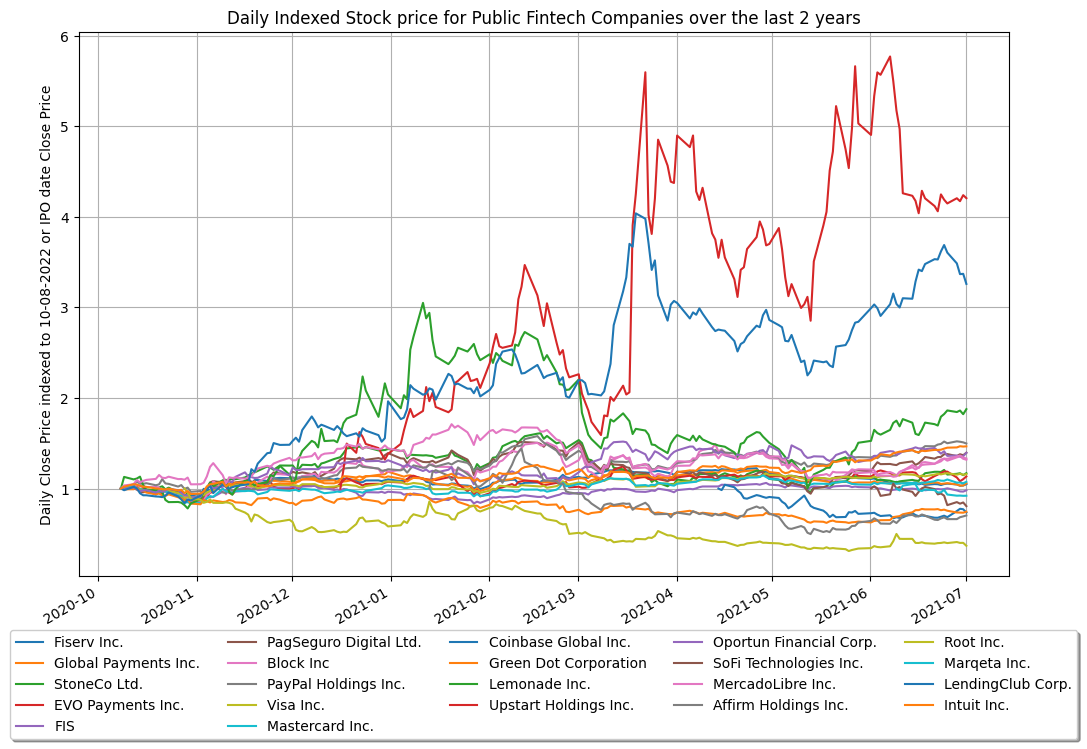

In [263]:
fdf.plot(x='t', figsize=(12, 8))
plt.grid()
plt.title('Daily Indexed Stock price for Public Fintech Companies over the last 2 years')
plt.ylabel('Daily Close Price indexed to 10-08-2022 or IPO date Close Price')
plt.legend(loc='center', bbox_to_anchor=(0.5, -.20), ncol=5, fancybox = True, shadow = True)
plt.show()

In [264]:
cols = ['t']
fdf = pd.DataFrame(pd.to_datetime(list(xdates)), columns=['t'])

for i, tdf in enumerate(odf):
    # indexed
    tmp = fdf.merge(tdf, how='left', left_on='t', right_on='t')
    tmp.sort_values(by='t', inplace=True)
    # tmp['c'] = tmp['c'] / tmp[tmp['c'].notna()]['c'].values[0]
    ticker = tmp['ticker'][tmp['ticker'].notna()].unique()[0]
    tmp.rename({'c': ticker}, axis=1, inplace=True)
    if type(ticker) == str:
        cols.append(ticker)
        fdf = tmp[cols]
    else:
        print(f'excluding {ticker}')
        break
        
fdf.rename(ticker_dict, axis=1, inplace=True)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_61729/1201052541.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf.rename(ticker_dict, axis=1, inplace=True)


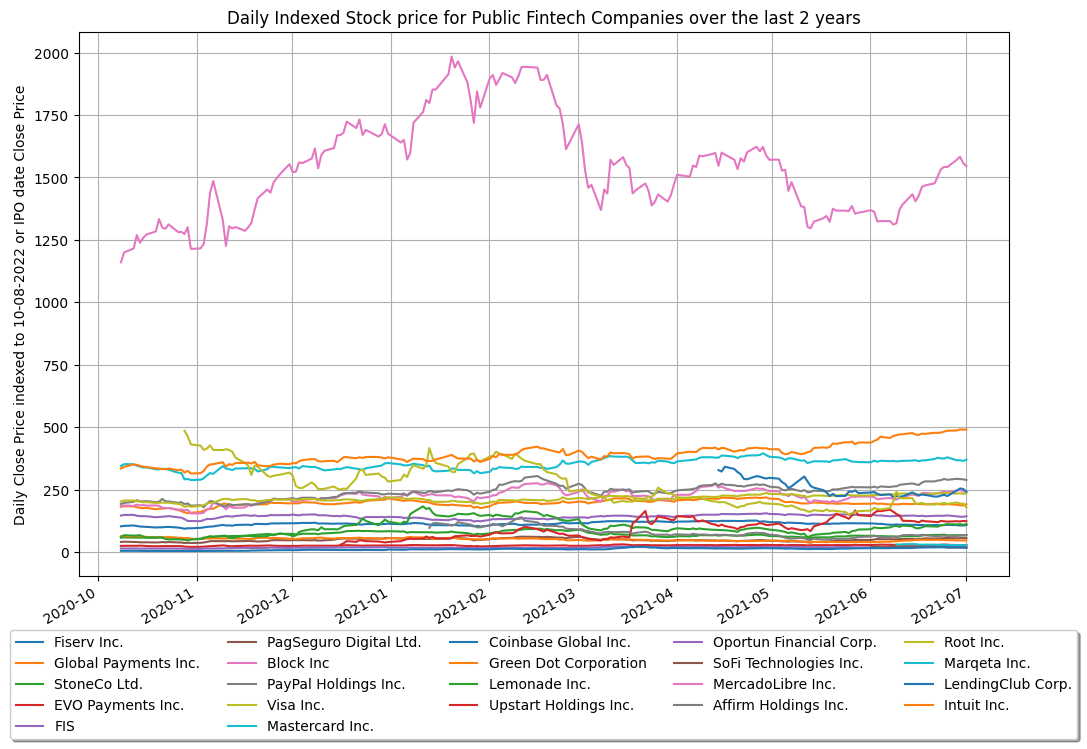

In [265]:
fdf.plot(x='t', figsize=(12, 8))
plt.grid()
plt.title('Daily Indexed Stock price for Public Fintech Companies over the last 2 years')
plt.ylabel('Daily Close Price indexed to 10-08-2022 or IPO date Close Price')
plt.legend(loc='center', bbox_to_anchor=(0.5, -.20), ncol=5, fancybox = True, shadow = True)
plt.show()